<a href="https://colab.research.google.com/github/mnylah/Quantitative-Neuroscience/blob/master/Linear_Regrression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.) Plot the relationship between Age and Wing Length.
2.) Calculate and plot the regression line.

[0.26468412 0.82962436]


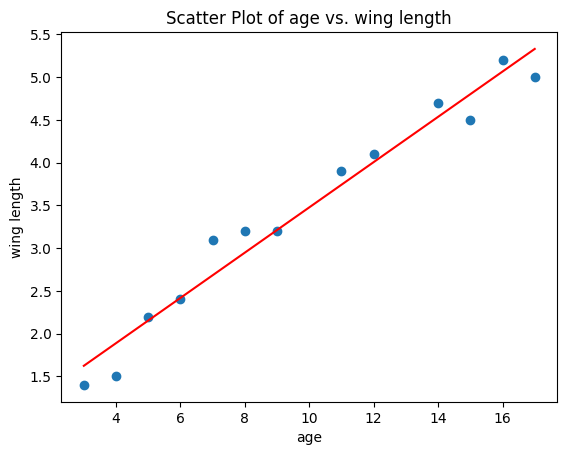

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Replace these lines with your actual x and y values
x = [3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17]
y = [1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]

# Create the scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel("age")
plt.ylabel("wing length")
plt.title("Scatter Plot of age vs. wing length")


#Calculate Regression line
Regression_line = np.polyfit(x, y, 1)
print(Regression_line)

# Plot the regression line
plt.plot(x, np.polyval(Regression_line, x), color='red') # Corrected plotting to use np.polyval

# Show the plot
plt.show()

y= 0.2468412x + 0.82962436

3.) Can you reject the null?

Calculate the p-value for the slope of your regression line and comparing it to a chosen significance level (alpha= 0.05)

In [14]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(f"P-value for the slope: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("The p-value is less than alpha, so you can reject the null hypothesis.")
else:
    print("The p-value is not less than alpha, so you cannot reject the null hypothesis.")

P-value for the slope: 3.0097431724571258e-09
The p-value is less than alpha, so you can reject the null hypothesis.


In [15]:
#just wanted to double check the p value and pearson's r
p_value = stats.pearsonr(x, y)
print(p_value)

PearsonRResult(statistic=np.float64(0.9815203776816283), pvalue=np.float64(3.0097431724567387e-09))


4.) Calculate and plot the confidence intervals on the slope of the regression.

In [17]:
# Assuming slope, std_err, x, and y are defined in previous cells
# If not, you would need to define them here or make sure they are accessible

# Degrees of freedom for a simple linear regression is n - 2
n = len(x)
degrees_of_freedom = n - 2

# Calculate the t-value for a 95% confidence interval (alpha = 0.05)
# For a two-tailed test, alpha/2 = 0.025
alpha = 0.05
t_value = stats.t.ppf(1 - alpha/2, degrees_of_freedom)

# Calculate the margin of error
margin_of_error = t_value * std_err

# Calculate the confidence interval
confidence_interval_lower = slope - margin_of_error
confidence_interval_upper = slope + margin_of_error

print(f"95% Confidence Interval for the slope: ({confidence_interval_lower:.4f}, {confidence_interval_upper:.4f})")

# While plotting confidence intervals for the slope directly on the scatter plot is not standard,
# you can visualize the uncertainty of the regression line itself by plotting confidence bands.
# This is a more complex task and would involve calculating the standard error of the predicted mean response
# at each point.
# For now, we have calculated the confidence interval for the slope value.

95% Confidence Interval for the slope: (0.2304, 0.2989)


5.) Calculate
 (the coefficient of determination)

 6.) Calculate Pearson's r

In [19]:
# Assuming r_value is defined in a previous cell from scipy.stats.linregress
# If not, you would need to calculate it first using scipy.stats.pearsonr or scipy.stats.linregress

r_squared = r_value**2

print(f"The coefficient of determination (R-squared) is: {r_squared:.4f}")

#calculate Pearson's r
pearson_r = stats.pearsonr(x, y)
print(pearson_r)

The coefficient of determination (R-squared) is: 0.9634
PearsonRResult(statistic=np.float64(0.9815203776816283), pvalue=np.float64(3.0097431724567387e-09))


7.) Add some noise to the data and see how the regression changes.

Regression line with noise: y = 0.2898x + 0.5411
R-squared with noise: 0.8972
P-value with noise: 0.0000


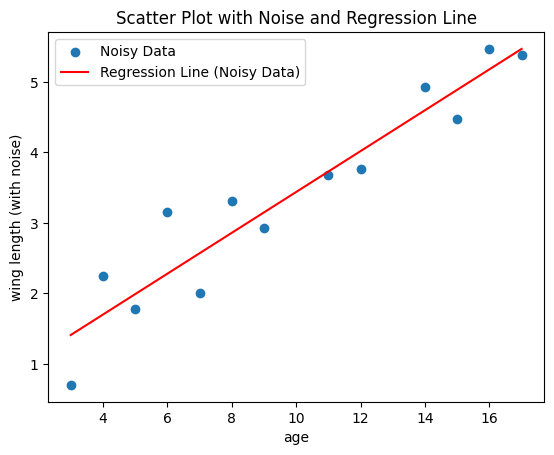

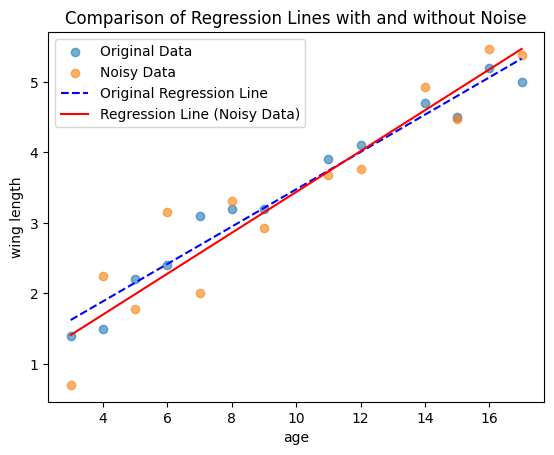

In [20]:
# Add some random noise to the y values
# You can adjust the scale of the noise as needed
noise_level = 0.5
y_noisy = y + np.random.normal(0, noise_level, len(y))

# Perform linear regression on the noisy data
slope_noisy, intercept_noisy, r_value_noisy, p_value_noisy, std_err_noisy = stats.linregress(x, y_noisy)

# Print the new regression parameters
print(f"Regression line with noise: y = {slope_noisy:.4f}x + {intercept_noisy:.4f}")
print(f"R-squared with noise: {r_value_noisy**2:.4f}")
print(f"P-value with noise: {p_value_noisy:.4f}")


# Plot the noisy data and the new regression line
plt.scatter(x, y_noisy, label='Noisy Data')
plt.plot(x, np.polyval([slope_noisy, intercept_noisy], x), color='red', label='Regression Line (Noisy Data)')

plt.xlabel("age")
plt.ylabel("wing length (with noise)")
plt.title("Scatter Plot with Noise and Regression Line")
plt.legend()
plt.show()

# Optional: Plot the original data and both regression lines for comparison
plt.scatter(x, y, label='Original Data', alpha=0.6)
plt.scatter(x, y_noisy, label='Noisy Data', alpha=0.6)
plt.plot(x, np.polyval([slope, intercept], x), color='blue', linestyle='--', label='Original Regression Line')
plt.plot(x, np.polyval([slope_noisy, intercept_noisy], x), color='red', label='Regression Line (Noisy Data)')

plt.xlabel("age")
plt.ylabel("wing length")
plt.title("Comparison of Regression Lines with and without Noise")
plt.legend()
plt.show()